In [ ]:
from datascience import *
import numpy as np
%matplotlib inline

## Group Mentoring

#### Watch Demo Videos Below

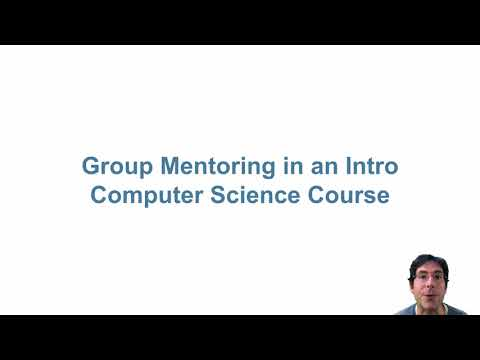

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('1tIOyFog0x0', width=800, height=300)

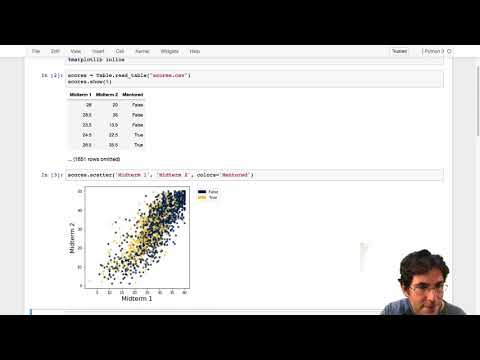

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('1JGx2ci2MYg', width=800, height=300)

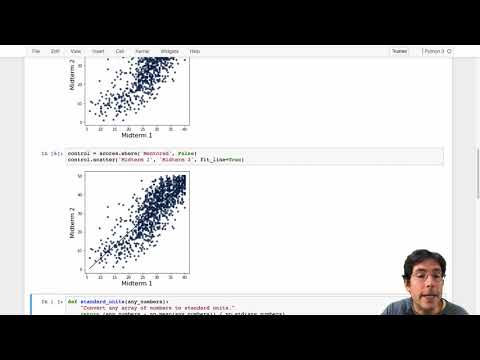

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('LE5fMT2u2LQ', width=800, height=300)

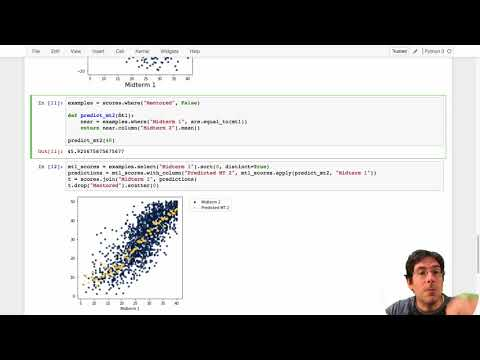

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('ijWAh68S4Zc', width=800, height=300)

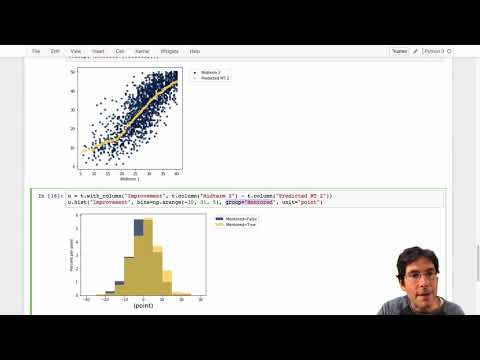

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('5MtIZiwVHv0', width=800, height=300)

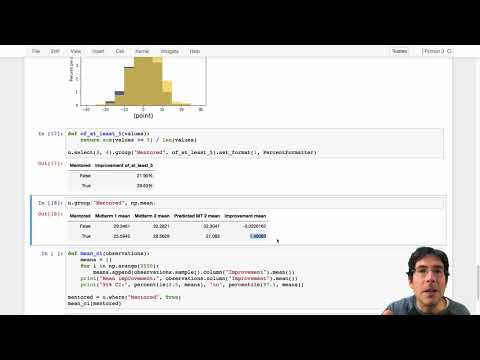

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('nqS_H2sGvEU', width=800, height=300)

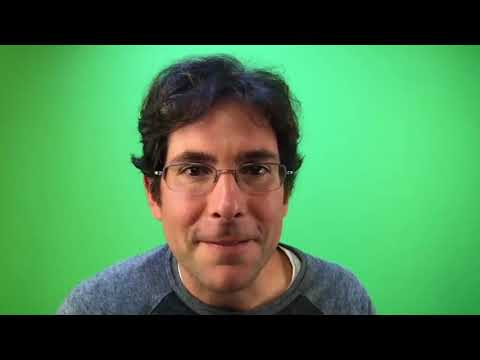

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo('Vi3sqsPZjfo', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
scores = Table.read_table("scores.csv")
scores.show(5)

In [ ]:
scores.scatter('Midterm 1', 'Midterm 2', colors='Mentored')

In [ ]:
scores.hist('Midterm 1', group='Mentored', bins=np.arange(0, 41, 5), normed=False)

In [ ]:
scores.where('Mentored', False).scatter('Midterm 1', 'Midterm 2')

In [ ]:
control = scores.where('Mentored', False)
control.scatter('Midterm 1', 'Midterm 2', fit_line=True)

In [ ]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers < np.mean(any_numbers)) / np.std(any_numbers)

# Below t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """The correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x))) * standard_units(t.column(y))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fitted_values(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)

def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

In [ ]:
plot_residuals(control, 'Midterm 1', 'Midterm 2')

In [ ]:
examples = scores.where("Mentored", False)

def predict_mt2(mt1):
    near = examples.where("Midterm 1", are.between_or_equal_to(mt1-2, mt1+2))
    return near.column("Midterm 2").mean()

predict_mt2(30)

In [ ]:
mt1_scores = examples.select("Midterm 1").sort(0, distinct=True)
predictions = mt1_scores.with_column("Predicted MT 2", mt1_scores.apply(predict_mt2, "Midterm 1"))
t = scores.join("Midterm 1", predictions)
t.drop("Mentored").scatter(0)

In [ ]:
u = t.with_column("Improvement", t.column("Midterm 2") - t.column("Predicted MT 2"))
u.hist("Improvement", bins=np.arange(-30, 31, 5), group="Mentored", unit="point")

In [ ]:
def of_at_least_5(values):
    return sum(values >= 5) / len(values)

u.select(2, 4).group("Mentored", of_at_least_5).set_format(1, PercentFormatter)

In [ ]:
u.group("Mentored", np.mean)

In [ ]:
def mean_ci(observations):
    means = []
    for i in np.arange(2000):
        means.append(observations.sample().column("Improvement").mean())
    lower, upper = percentile(2.5, means), percentile(97.5, means)
    print("Mean improvement:", observations.column("Improvement").mean())
    print("95% CI of mean improvement:", lower, "to", upper)

mentored = u.where("Mentored", True)
mean_ci(mentored)